## Разведочный анализ данных

В файле рядом (heart.csv) лежит датасет со статистикой о заболеваниях сердца. 

1) Загрузите данные

2) Какого они размера? Есть ли в них пропуски?

3) Выведите основные статистики по числовым столбцам (среднее, квантили...)

4) Постройте гистограмму возраста пациентов.

5) Среди какого пола большая доля больных людей? (болен ли человек записано в столбце target, 1 - болен, 0 - нет)

6) Сохраните найденные в пункте 3 статистики в excel файл.

In [10]:
# загружаеем библиотеки для функций анализ данных
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline 

In [11]:
# 1) Загружаем данные
data = pd.read_csv('heart.csv')

In [17]:
# 2) размерность данных 303 строки 14 столбцов
data.shape
# смотрим общую информацию об объетке в столбце NNcount нет нулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
# 3) выводим основные статистики и квантили с помощью функции describe для всей таблицы
data.describe()
# если брать только значения без типа и без бинарных переменных
d1 = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()
print(d1)

              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

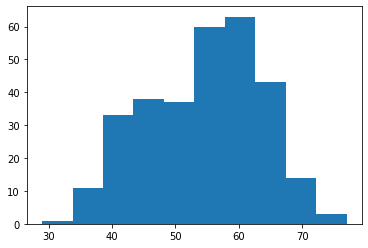

In [19]:
# 4) выводим гистограмму возраста клиентов с помощью функции plt.hist()

plt.hist(data['age'])


In [48]:
# 5) 
# заболевания по мужчинам
# с помощью арифметической средней mean() находим долю, округляем до двух знаков после запятой с помощью round
round(data['target'][data['sex'] == 1].mean(), 2)

0.45

In [49]:
# заболевания по женщинам
round(data['target'][data['sex'] == 0].mean(),2)
# Заболеваемость у женщин выше чем у мужчин

0.75

In [53]:
# 6) сохраняем пункт 3
d1.to_excel('descr_stat.xlsx')